# ML210-Assignment 6: Resampling Methods

Dataset needed:
UCI Diabetes Data Set  (https://archive.ics.uci.edu/ml/datasets/diabetes)


In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split

data = pd.read_csv('diabetes.csv')
print(data.info())
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


<h3> Q.1. Make an 80/20 train/test split</h3>

In [19]:
#TODO
X = data.drop('Outcome', axis=1)

y = data['Outcome']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=5)

X_train.head()



,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
140,3,128,78,0,0,21.1,0.268,55
358,12,88,74,40,54,35.3,0.378,48
143,10,108,66,0,0,32.4,0.272,42
674,8,91,82,0,0,35.6,0.587,68
121,6,111,64,39,0,34.2,0.260,24


In [20]:
from sklearn.linear_model import LogisticRegression

regr = LogisticRegression(solver = 'lbfgs', max_iter=200)

# Train the model using the training sets
regr.fit(X_train,y_train)

print(regr.coef_)

[[ 1.24611828e-01  3.37979053e-02 -1.69717116e-02 -3.90544558e-03
  -5.65295947e-04  8.93882260e-02  9.90056921e-01  1.70910779e-02]]


<h3>Q.2. Fit a logistic regression model on the training data</h3>

<h3> Q.3. Predict the test data</h3>

In [21]:

y_pred = regr.predict(X_test)
print(y_pred)

[0 0 0 0 0 0 1 1 1 0 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 1 0 1 1 0 0 0 1 0 1 0 0 0 0 0 1 0 1 1 1 0 1 0 0 0 1 0 1 0 0 1
 1 0 0 1 1 0 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 1 1 0 1 0 0 1 0 0
 1 0 0 0 0 0 1 0 0 1 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 0 1 1 0 1]


<h3> Q.4. Plot the ROC curve and compute the AUC score</h3>

AUC: 0.86


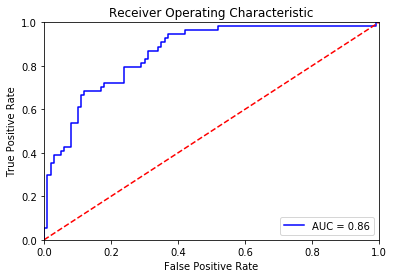

In [22]:
# Plot outputs
import matplotlib.pyplot as plt
import sklearn.metrics
from sklearn import preprocessing, metrics
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score

%matplotlib inline

# calculate the fpr and tpr for all thresholds of the classification
probs = regr.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

print("AUC: {}".format(roc_auc))

# Plot the ROC curve
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

<h3> Q.5. Calculate the accuracy metric of the observations in the test set</h3>

In [23]:
#TODO
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn import metrics

metrics.mean_squared_error(y_test, y_pred)

0.18831168831168832

## Cross-Validation

## *k-*Fold Cross-Validation

<h3> Q.6. In few sentences, explain how K-fold procedure work<h3>

In [24]:
# data set is split into a K number of folds and each fold is used as a testing set in the process. 

<h3> Q.7. Perform logistic regression using *k-*fold cross validation, try different values of k and print out the mean accuracy obtained.
</h3>

In [33]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
kfold = KFold(n_splits=10)

model = LogisticRegression(solver = 'lbfgs', max_iter=300)
scores = cross_val_score(model, X_train, y_train, cv=kfold)

           


print(scores.mean())

0.7671602326811211


## The Bootstrap

<h3> Q.8.Print the target class distribution (You can see that there's almost twice as much 0s than 1s)
</h3>

In [27]:
#TODO
from sklearn.utils import resample
from sklearn.metrics import accuracy_score
import numpy as np

values = data.values
# configure bootstrap

n_iterations = 50
n_size = int(len(data) * 0.50)

Let's perform bootstrapping to up-sample the minority class

1. First, we'll import the resampling module from Scikit-Learn
2. Next, we'll resample the minority class with replacement, setting the number of samples to match that of the majority class
3. Finally, we'll combine the up-sampled minority class DataFrame with the original majority class DataFrame.

In [39]:
# Separate majority and minority classes
majority_class = data[data['Outcome']==0]
minority_class = data[data['Outcome']==1]

 
# Upsample minority class
minority_upsampled = resample(minority_class, 
                                 replace=True,  # sample with replacement
                                 n_samples=768,   # to match majority class
                                 random_state=42)   # reproducible results
 
# Combine majority class with upsampled minority class
data_upsampled = pd.concat([majority_class, minority_upsampled])
 

<h3> Q.9. Display new class counts</h3>

In [40]:
#TODO: the new DataFrame should now have more observations than the original, and the ratio of the two classes is now 

data_upsampled.value_counts()

AttributeError: 'DataFrame' object has no attribute 'value_counts'

<h3> Q.10. Let's train another model using Logistic Regression, this time on the balanced dataset</h3>

In [42]:
# Separate input features (X) and target variable (y)
#TODO

y = data_upsampled['Outcome']
X = data_upsampled.drop('Outcome', axis=1)
#Perform train test split 80/20
#TODO
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=5)



 
# Train model
clf_2 = LogisticRegression().fit(X, y)
 
# Predict on training set
pred_y_2 = clf_2.predict(X_train)
 

print( accuracy_score(y, pred_y_2) )
#TODO

# How's our accuracy? Has it improved? Comment
#TODO

/usr/local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


ValueError: Found input variables with inconsistent numbers of samples: [1268, 1014]

<h3> Q.11. Create a new text cell in your Notebook: Complete a 50-100 word summary 
    (or short description of your thinking in applying this week's learning to the solution) 
     of your experience in this assignment. Include:
<br>                                                                       
What was your incoming experience with this model, if any?
what steps you took, what obstacles you encountered.
how you link this exercise to real-world, machine learning problem-solving. (What steps were missing? What else do you need to learn?)
This summary allows your instructor to know how you are doing and allot points for your effort in thinking and planning, and making connections to real-world work.
</h3>

In [ ]:
# Enter summary here
# I couldn't quite figure out how to define majority_class and minority class in Bootstrap. Please advic
